In [ ]:
import sklearn as sk
import pandas as pd
import numpy as np
from sklearn import metrics
import imblearn as imb
import matplotlib.pyplot as plt

# Import data set
## Splits the features column from the class column 
## First ten rows are the features while the last row is the classification

In [ ]:

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data'
header = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df = pd.read_csv(url,names = header)

x = df.iloc[:,0:10]
y = df.iloc[:,-1]
display(x.shape)
display(y.shape)

(19020, 10)

(19020,)

# Spliting the data to 70% train and 30% test

In [ ]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=70)
display(x_train.shape)
display(x_test.shape)
display(y_train.shape)
display(y_test.shape)

(13314, 10)

(5706, 10)

(13314,)

(5706,)

# Balancing the training data set using imblearn's undersampling.
It's important to note that this is done after splitting as it makes the test data representative of real world data, this also usually results in less throw-away data.

In [ ]:

from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority',random_state=70)
x_bal, y_bal = undersample.fit_resample(x_train, y_train)
display(x_bal.shape)
display(y_bal.shape)


(9448, 10)

(9448,)

# Decision Tree 




Decision Tree:
Accuracy =  0.7912723449001051
classification report:
               precision    recall  f1-score   support

           g       0.87      0.80      0.83      3742
           h       0.67      0.78      0.72      1964

    accuracy                           0.79      5706
   macro avg       0.77      0.79      0.78      5706
weighted avg       0.80      0.79      0.79      5706

Confusion Matrix:


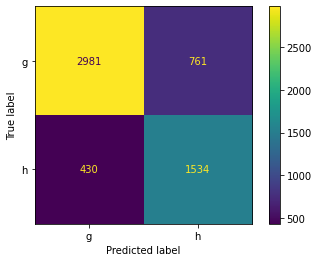

In [ ]:

from sklearn.tree import DecisionTreeClassifier

decisionTreeClassifier = DecisionTreeClassifier(random_state=70)
decisionTreeClassifier.fit(x_bal,y_bal)

y_predicted = decisionTreeClassifier.predict(x_test)
print('Decision Tree:')
print("Accuracy = " ,metrics.accuracy_score(y_test,y_predicted))
print("classification report:\n", metrics.classification_report(y_test, y_predicted))
cm = metrics.confusion_matrix(y_test, y_predicted, labels = decisionTreeClassifier.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = decisionTreeClassifier.classes_)
print("Confusion Matrix:")
disp.plot()
plt.show()

# Ada boost cross validation and model training
- Note that the Grid Search was executed multiple time with diffrent ranges of "n_estimators" before the range was narrowed down to the range [ 135,155]. 
- Adaboost uses Decision trees as default weak learners with max_depth=1.   
-  n_estimators indicates the number of decision trees to be used.  
-  Obtained the best n_estimators and use it in the prediction.

In [ ]:
from sklearn.experimental import enable_halving_search_cv # noqa
from sklearn.model_selection import HalvingGridSearchCV

from sklearn.ensemble import AdaBoostClassifier
parameters = {'n_estimators' : np.linspace(start = 135, stop = 155, num = 20, dtype = int)}
abc = HalvingGridSearchCV(AdaBoostClassifier(random_state=70), parameters, random_state=70)
abc.fit(x_bal,y_bal)
print(abc.best_params_)

{'n_estimators': 143}


# Ada boost prediction using test data
- Accuracy of ada boost is less than random forest as each weak learner is trained on data, taking into account the previous weak learners’ success or failure and update weights accordingly.
- So, it increases overfitting the training data.

Ada Boost
Best n_estimators
{'n_estimators': 143}
Accuracy =  0.8170347003154574
classification report:
               precision    recall  f1-score   support

           g       0.89      0.82      0.86      3742
           h       0.71      0.80      0.75      1964

    accuracy                           0.82      5706
   macro avg       0.80      0.81      0.80      5706
weighted avg       0.83      0.82      0.82      5706

Confusion Matrix:


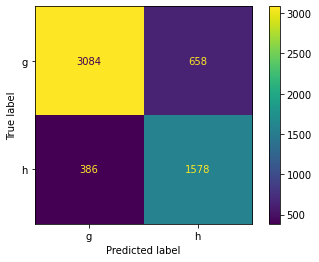

In [ ]:
y_predicted = abc.predict(x_test)
print('Ada Boost\nBest n_estimators')
print(abc.best_params_)
print("Accuracy = " ,metrics.accuracy_score(y_test,y_predicted))
print("classification report:\n", metrics.classification_report(y_test, y_predicted))
cm = metrics.confusion_matrix(y_test, y_predicted, labels = abc.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = abc.classes_)
print("Confusion Matrix:")
disp.plot()
plt.show()

# K-neareast Nieghbors cross validation and model training

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
parameters = {'n_neighbors' : np.linspace(start= 3, stop = 30, num = 27, dtype = int)}
knnc = GridSearchCV(KNeighborsClassifier(), parameters)
knnc.fit(x_bal,y_bal)
print(knnc.best_params_)

{'n_neighbors': 13}


# K-neareast Nieghbors prediction using test data
- Although KNN is simple model but it produces reasonable accurecy.


K-neareast Nieghbors
Best K
{'n_neighbors': 13}
Accuracy =  0.7910970907816334
classification report:
               precision    recall  f1-score   support

           g       0.83      0.86      0.84      3742
           h       0.71      0.66      0.68      1964

    accuracy                           0.79      5706
   macro avg       0.77      0.76      0.76      5706
weighted avg       0.79      0.79      0.79      5706

Confusion Matrix:


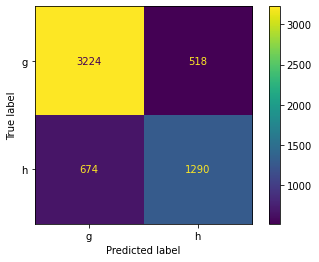

In [ ]:

y_predicted = knnc.predict(x_test)
print('K-neareast Nieghbors\nBest K')
print(knnc.best_params_)
print("Accuracy = " ,metrics.accuracy_score(y_test,y_predicted))
print("classification report:\n", metrics.classification_report(y_test, y_predicted))
cm = metrics.confusion_matrix(y_test, y_predicted, labels = knnc.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knnc.classes_)
print("Confusion Matrix:")
disp.plot()
plt.show()

# Random Forest cross validation and model training
Note that the Grid Search was executed multiple time with diffrent ranges of "n_estimators" before the range was narrowed down to what you can see now

In [ ]:

from sklearn.experimental import enable_halving_search_cv # noqa
from sklearn.model_selection import HalvingGridSearchCV

from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators' : np.linspace(start = 365, stop = 385, num = 20, dtype = int)}
rfc = HalvingGridSearchCV(RandomForestClassifier(random_state=70), parameters,random_state=70)
rfc.fit(x_bal,y_bal)
print(rfc.best_params_)

{'n_estimators': 375}


# Random Forest Nieghbors prediction using test data  
- We can see that random forests gives the best accuracy as it follows modified bagging technique to reduce the correlation between trees.  
- Random forest uses decision trees as weak learners.
- At each split it chooses a different set of features and the optimal split is chosen within the subset.

Random Forest
Best n_estimators
{'n_estimators': 375}
Accuracy =  0.8655800911321416
classification report:
               precision    recall  f1-score   support

           g       0.91      0.89      0.90      3742
           h       0.79      0.82      0.81      1964

    accuracy                           0.87      5706
   macro avg       0.85      0.86      0.85      5706
weighted avg       0.87      0.87      0.87      5706

Confusion Matrix:


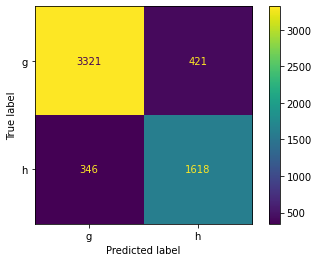

In [ ]:

y_predicted = rfc.predict(x_test)
print('Random Forest\nBest n_estimators')
print(rfc.best_params_)
print("Accuracy = " ,metrics.accuracy_score(y_test,y_predicted))
print("classification report:\n", metrics.classification_report(y_test, y_predicted))
cm = metrics.confusion_matrix(y_test, y_predicted, labels = rfc.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rfc.classes_)
print("Confusion Matrix:")
disp.plot()
plt.show()

# Naive Bayes

- This bad accuracy implies that features are dependent and aren't normally distributed as Gaussian Naive Bayes assumes independence between features and data is normally distributed.   


Naive Bayes
Accuracy =  0.7285313704872064
classification report:
               precision    recall  f1-score   support

           g       0.74      0.89      0.81      3742
           h       0.67      0.41      0.51      1964

    accuracy                           0.73      5706
   macro avg       0.71      0.65      0.66      5706
weighted avg       0.72      0.73      0.71      5706

Confusion Matrix:
 [[3343  399]
 [1150  814]]


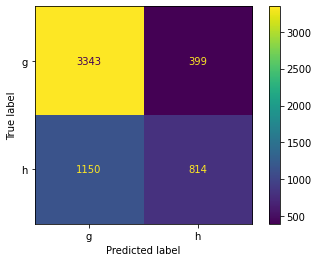

In [ ]:
from sklearn.naive_bayes import GaussianNB
gaussianNB = GaussianNB()
gaussianNB.fit(x_bal,y_bal)
y_predicted = gaussianNB.predict(x_test)
print('Naive Bayes')
print("Accuracy = " ,metrics.accuracy_score(y_test,y_predicted))
print("classification report:\n", metrics.classification_report(y_test, y_predicted))
cm = metrics.confusion_matrix(y_test, y_predicted, labels = gaussianNB.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = gaussianNB.classes_)
print("Confusion Matrix:\n",cm)
disp.plot()
plt.show()